In [1]:
#@title loading helpful packages

import numpy as np     
import pandas as pd

## Visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data_file_path = 'Jan-24 project.csv'

# loading data as pandas dataframe
df = pd.read_csv(data_file_path)

In [3]:
#look at data
pd.DataFrame(df)

,product_id,product_title,category,product_subcategory,brand,selling_price,original_price,product_type,product_rating,product_description,availability_status,customer_reviews_count,seasonal_indicator,promotion_indicator,shipping_weight,bundle_indicator,customer_demographics
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...,In Stock,7,Spring,Yes,0.658145,Individual,Female
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ...",In Stock,54,Winter,No,4.734585,Bundle,Female
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m...",In Stock,31,Winter,No,2.024140,Bundle,Female
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...,In Stock,49,Spring,No,3.869239,Individual,Other
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...,In Stock,74,Winter,Yes,0.812489,Individual,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27550,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...,In Stock,75,Autumn,Yes,1.992988,Bundle,Other
27551,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...,In Stock,65,Autumn,No,2.893314,Bundle,Female
27552,27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,We have taken the richness of Sweet Potatoes (...,In Stock,61,Autumn,Yes,3.644294,Individual,Female
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori...",In Stock,7,Summer,No,4.540101,Individual,Other


In [4]:
# concise Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product_id              27555 non-null  int64  
 1   product_title           27554 non-null  object 
 2   category                27555 non-null  object 
 3   product_subcategory     27555 non-null  object 
 4   brand                   27554 non-null  object 
 5   selling_price           27555 non-null  float64
 6   original_price          27555 non-null  float64
 7   product_type            27555 non-null  object 
 8   product_rating          18929 non-null  float64
 9   product_description     27440 non-null  object 
 10  availability_status     27555 non-null  object 
 11  customer_reviews_count  27555 non-null  int64  
 12  seasonal_indicator      27555 non-null  object 
 13  promotion_indicator     27555 non-null  object 
 14  shipping_weight         27555 non-null

In [5]:
# check for missing values
print(df.isnull().sum())

product_id                   0
product_title                1
category                     0
product_subcategory          0
brand                        1
selling_price                0
original_price               0
product_type                 0
product_rating            8626
product_description        115
availability_status          0
customer_reviews_count       0
seasonal_indicator           0
promotion_indicator          0
shipping_weight              0
bundle_indicator             0
customer_demographics        0
dtype: int64


In [6]:
# check for unique values
for col in df.columns:
    print(f"Feature: {col}, DType: {df[col].dtype}")
    print(f"# of unique values = {df[col].nunique()}")
    print("")

Feature: product_id, DType: int64
# of unique values = 27555

Feature: product_title, DType: object
# of unique values = 23540

Feature: category, DType: object
# of unique values = 11

Feature: product_subcategory, DType: object
# of unique values = 90

Feature: brand, DType: object
# of unique values = 2313

Feature: selling_price, DType: float64
# of unique values = 3256

Feature: original_price, DType: float64
# of unique values = 1348

Feature: product_type, DType: object
# of unique values = 426

Feature: product_rating, DType: float64
# of unique values = 40

Feature: product_description, DType: object
# of unique values = 21944

Feature: availability_status, DType: object
# of unique values = 1

Feature: customer_reviews_count, DType: int64
# of unique values = 101

Feature: seasonal_indicator, DType: object
# of unique values = 4

Feature: promotion_indicator, DType: object
# of unique values = 2

Feature: shipping_weight, DType: float64
# of unique values = 27555

Feature: bu

#### Identify redundant columns/features

#### No uniqueness
- `availability_status` $\rightarrow$ "In Stock"

#### Large number of unique values
- `product_id` $\rightarrow$ all are sequential values

In [7]:
data = df.drop(columns = ['product_id', 'availability_status'])

#### Drop rows with features having less missing values

In [8]:
data = data.dropna(subset=['brand', 'product_title'])

In [9]:
print(data.isnull().sum())

product_title                0
category                     0
product_subcategory          0
brand                        0
selling_price                0
original_price               0
product_type                 0
product_rating            8625
product_description        114
customer_reviews_count       0
seasonal_indicator           0
promotion_indicator          0
shipping_weight              0
bundle_indicator             0
customer_demographics        0
dtype: int64


#### Impute missing values in `product_rating`

In [10]:
# fill the missing values with median of brand
data['product_rating'] = data.groupby('brand')['product_rating'].transform(lambda x: x.fillna(x.median()))

In [11]:
data['product_rating'].isnull().sum()

1609

In [12]:
# fill the remaining missing values with median of category
data['product_rating'] = data.groupby('category')['product_rating'].transform(lambda x: x.fillna(x.median()))

In [13]:
data['product_rating'].isnull().sum()

0

/home/sagar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sagar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


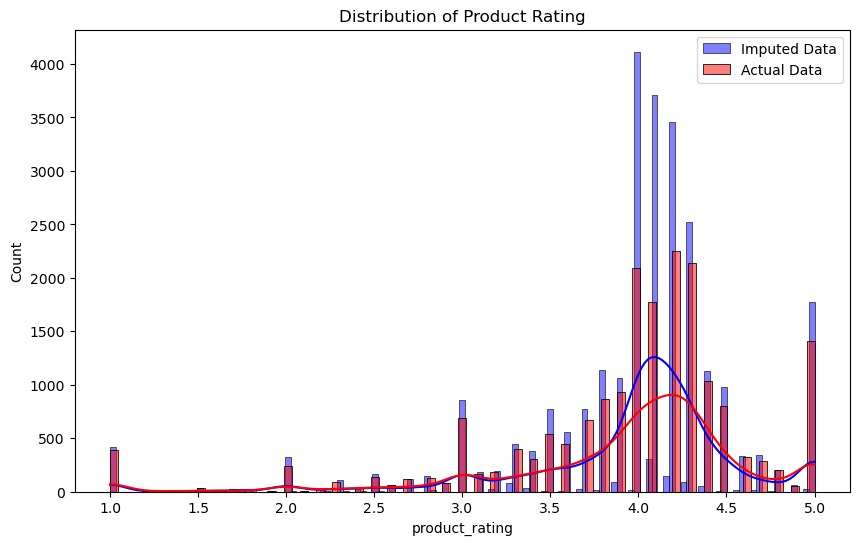

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data['product_rating'], kde=True, color='blue', label='Imputed Data')
sns.histplot(df['product_rating'], kde=True, color='red', label='Actual Data')
plt.title('Distribution of Product Rating')
plt.legend()
plt.show();

#### Creating new feature
- `discount_offered` = 100 * (`selling_price` - `original_price`)/`original_price`

In [15]:
data['discount_offered'] = (100 * (data['original_price'] - data['selling_price'])/data['original_price']).round(2)

In [16]:
data.head()

,product_title,category,product_subcategory,brand,selling_price,original_price,product_type,product_rating,product_description,customer_reviews_count,seasonal_indicator,promotion_indicator,shipping_weight,bundle_indicator,customer_demographics,discount_offered
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...,7,Spring,Yes,0.658145,Individual,Female,0.00
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ...",54,Winter,No,4.734585,Bundle,Female,0.00
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m...",31,Winter,No,2.024140,Bundle,Female,52.40
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...,49,Spring,No,3.869239,Individual,Other,15.34
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...,74,Winter,Yes,0.812489,Individual,Male,0.00


#### New feature as `brand_scale` which indicate brands based on number of products

- `high`

- `medium`

- `low`

In [17]:
brand_products_count = data['brand'].value_counts()
brand_products_count = brand_products_count.reset_index()
brand_products_count.head(10)

,brand,count
0,Fresho,638
1,bb Royal,539
2,BB Home,428
3,DP,250
4,Fresho Signature,171
5,bb Combo,168
6,Amul,153
7,INATUR,146
8,Himalaya,141
9,Dabur,138


In [18]:
fig = px.box(brand_products_count, y='count', title='Brand Products Count Distribution', height=600,width=400)
fig.show();

In [19]:
# count the number of brands having count less than 120
brand_products_count_less_than_12 = brand_products_count[brand_products_count['count'] < 12]
print(f"# of brands having count less than 12 = \t{brand_products_count_less_than_12.shape[0]}", "\t=>\t`low` scale")
brand_products_count_less_than_110 = brand_products_count[(brand_products_count['count'] < 110) & (brand_products_count['count'] >= 12 )]
print(f"# of brands having count less than 110 = \t{brand_products_count_less_than_110.shape[0]}", "\t=>\t`medium` scale")
brand_products_count_gret_than_110 = brand_products_count[brand_products_count['count'] > 110]
print(f"# of brands having count greater than 110 = \t{brand_products_count_gret_than_110.shape[0]}", "\t=>\t`high` scale")

# of brands having count less than 12 = 	1709 	=>	`low` scale
# of brands having count less than 110 = 	589 	=>	`medium` scale
# of brands having count greater than 110 = 	15 	=>	`high` scale


In [20]:
# map these brand_products_count to each brand in the data in new column brand_products_count
data = data.merge(brand_products_count, on='brand', how='left')
data.head()

,product_title,category,product_subcategory,brand,selling_price,original_price,product_type,product_rating,product_description,customer_reviews_count,seasonal_indicator,promotion_indicator,shipping_weight,bundle_indicator,customer_demographics,discount_offered,count
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...,7,Spring,Yes,0.658145,Individual,Female,0.00,12
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ...",54,Winter,No,4.734585,Bundle,Female,0.00,58
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m...",31,Winter,No,2.024140,Bundle,Female,52.40,42
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...,49,Spring,No,3.869239,Individual,Other,15.34,103
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...,74,Winter,Yes,0.812489,Individual,Male,0.00,87


In [21]:
# create a new column brand_scale based on the count column, if the count is less than 12 then the value will be 'low', elif the count is greater than 12 and less than 110 then the value will be 'medium' else 'high'
data['brand_scale'] = data['count'].apply(lambda x: 'low' if x < 12 else 'medium' if (x < 110 and x >= 12) else 'high')

In [22]:
scale = {s:0 for s in ['high', 'medium', 'low']}
cross_check_scale = data.groupby(['brand_scale', 'brand']).groups
for (s, _) in cross_check_scale.keys():
    if s == "high":
        scale['high'] += 1
    if s == "medium":
        scale['medium'] += 1
    if s == "low":
        scale['low'] += 1
print(scale)

{'high': 15, 'medium': 589, 'low': 1709}


In [23]:
data = data.drop(columns='count')
data.head()

,product_title,category,product_subcategory,brand,selling_price,original_price,product_type,product_rating,product_description,customer_reviews_count,seasonal_indicator,promotion_indicator,shipping_weight,bundle_indicator,customer_demographics,discount_offered,brand_scale
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...,7,Spring,Yes,0.658145,Individual,Female,0.00,medium
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ...",54,Winter,No,4.734585,Bundle,Female,0.00,medium
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m...",31,Winter,No,2.024140,Bundle,Female,52.40,medium
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...,49,Spring,No,3.869239,Individual,Other,15.34,medium
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...,74,Winter,Yes,0.812489,Individual,Male,0.00,medium


In [24]:
# data.to_csv('../my_data.csv', index=False)

In [25]:
data['products_sold'] = ((data['customer_reviews_count'] * (1 + (data['product_rating']/5))).round()).astype('int64')
data.head()

,product_title,category,product_subcategory,brand,selling_price,original_price,product_type,product_rating,product_description,customer_reviews_count,seasonal_indicator,promotion_indicator,shipping_weight,bundle_indicator,customer_demographics,discount_offered,brand_scale,products_sold
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...,7,Spring,Yes,0.658145,Individual,Female,0.00,medium,13
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ...",54,Winter,No,4.734585,Bundle,Female,0.00,medium,79
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m...",31,Winter,No,2.024140,Bundle,Female,52.40,medium,52
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...,49,Spring,No,3.869239,Individual,Other,15.34,medium,85
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...,74,Winter,Yes,0.812489,Individual,Male,0.00,medium,139


In [26]:
data['revenue'] = data['selling_price'] * data['products_sold']
data

,product_title,category,product_subcategory,brand,selling_price,original_price,product_type,product_rating,product_description,customer_reviews_count,seasonal_indicator,promotion_indicator,shipping_weight,bundle_indicator,customer_demographics,discount_offered,brand_scale,products_sold,revenue
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...,7,Spring,Yes,0.658145,Individual,Female,0.00,medium,13,2860.00
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ...",54,Winter,No,4.734585,Bundle,Female,0.00,medium,79,14220.00
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m...",31,Winter,No,2.024140,Bundle,Female,52.40,medium,52,6188.00
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...,49,Spring,No,3.869239,Individual,Other,15.34,medium,85,12665.00
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...,74,Winter,Yes,0.812489,Individual,Male,0.00,medium,139,22518.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27548,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...,75,Autumn,Yes,1.992988,Bundle,Other,20.00,medium,134,26692.80
27549,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...,65,Autumn,No,2.893314,Bundle,Female,10.00,medium,117,7897.50
27550,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,We have taken the richness of Sweet Potatoes (...,61,Autumn,Yes,3.644294,Individual,Female,0.00,medium,107,21400.00
27551,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori...",7,Summer,No,4.540101,Individual,Other,20.00,medium,13,5148.00


In [27]:
test = pd.DataFrame(data.groupby([data['category'], data['brand']], as_index=False)['revenue'].sum())
# test.to_csv('../test_file.csv', index=True)
test

,category,brand,revenue
0,Baby Care,1st Bites,39225.00
1,Baby Care,Amul,61940.00
2,Baby Care,Aptamil,124410.00
3,Baby Care,Aveeno,164401.00
4,Baby Care,BIOTIQUE,13290.75
...,...,...,...
2775,Snacks & Branded Foods,bb Popular,1015.00
2776,Snacks & Branded Foods,bb Royal,325839.08
2777,Snacks & Branded Foods,iD,7070.00
2778,Snacks & Branded Foods,iD Fresho,64532.52


In [28]:
data[data['category']=="Baby Care"]['revenue'].sum()

29195550.15

11
category = Beauty & Hygiene
             category           brand     revenue  market_share
312  Beauty & Hygiene            Dkny  9210980.00          3.15
168  Beauty & Hygiene           Ajmal  7213245.88          2.47
704  Beauty & Hygiene      StBotanica  5426750.00          1.86
425  Beauty & Hygiene         INATUR   5386493.50          1.84
726  Beauty & Hygiene   The Face Shop  4710898.60          1.61
..                ...             ...         ...           ...
717  Beauty & Hygiene    Swiss Beauty      448.20          0.00
493  Beauty & Hygiene           Livon      432.00          0.00
707  Beauty & Hygiene      Strawberry      350.00          0.00
443  Beauty & Hygiene  Johnson's baby       56.10          0.00
705  Beauty & Hygiene       SterloMax        0.00          0.00

[644 rows x 4 columns]


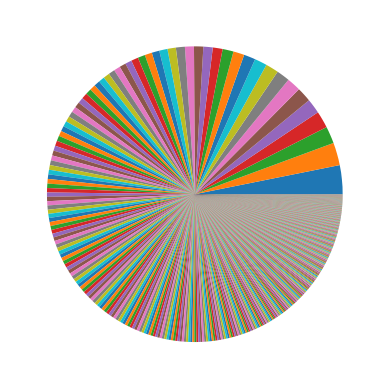

total revenue in category = 292294619.67




category = Kitchen, Garden & Pets
                    category        brand      revenue  market_share
2354  Kitchen, Garden & Pets     Prestige  11148187.00          7.01
2194  Kitchen, Garden & Pets      BB Home   7706417.00          4.84
2267  Kitchen, Garden & Pets      Hawkins   7351855.75          4.62
2225  Kitchen, Garden & Pets      Corelle   6072370.00          3.82
2212  Kitchen, Garden & Pets        Cello   4427127.00          2.78
...                      ...          ...          ...           ...
2415  Kitchen, Garden & Pets  Wood & Kemp      5488.00          0.00
2213  Kitchen, Garden & Pets    Cerbiatto      3379.00          0.00
2272  Kitchen, Garden & Pets     Himalaya      3220.00          0.00
2226  Kitchen, Garden & Pets        Cosmo      1090.00          0.00
2362  Kitchen, Garden & Pets        Rasna       900.00          0.00

[240 rows x 4 columns]


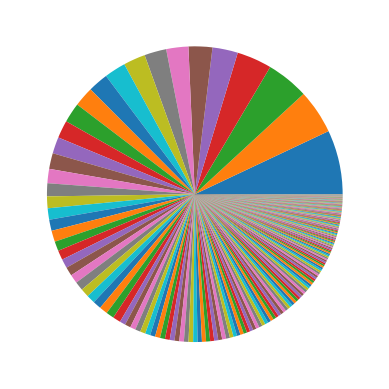

total revenue in category = 159131762.35




category = Cleaning & Household
                  category         brand     revenue  market_share
1045  Cleaning & Household            DP  2547247.70          4.73
1197  Cleaning & Household        Nakoda  2490440.00          4.62
1355  Cleaning & Household      bb Combo  1581596.22          2.94
1308  Cleaning & Household    Soulflower  1524000.00          2.83
1290  Cleaning & Household  Scotch brite  1434867.26          2.66
...                    ...           ...         ...           ...
990   Cleaning & Household   Asthagandha      480.00          0.00
1183  Cleaning & Household     Morelight      369.00          0.00
1245  Cleaning & Household   Priya Brand      275.00          0.00
1328  Cleaning & Household     Unik Home      130.00          0.00
1076  Cleaning & Household    Feel Fresh      110.00          0.00

[391 rows x 4 columns]


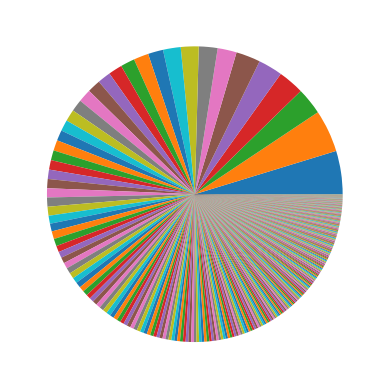

total revenue in category = 53872829.25




category = Gourmet & World Food
                  category                     brand     revenue  market_share
1747  Gourmet & World Food                  Colavita  3754227.00          2.73
1677  Gourmet & World Food                    BORGES  2898961.53          2.11
1816  Gourmet & World Food          Fresho Signature  2713037.35          1.97
2080  Gourmet & World Food                       Sol  2643714.50          1.92
1813  Gourmet & World Food                   Fragata  2199100.00          1.60
...                    ...                       ...         ...           ...
2010  Gourmet & World Food                     Parle     2035.00          0.00
1968  Gourmet & World Food               Naturesmith      880.00          0.00
1679  Gourmet & World Food              Bakersveggie      437.00          0.00
2122  Gourmet & World Food  The Healthy Cravings Co.      300.00          0.00
2151  Gourmet & World Food                   Van Pur   

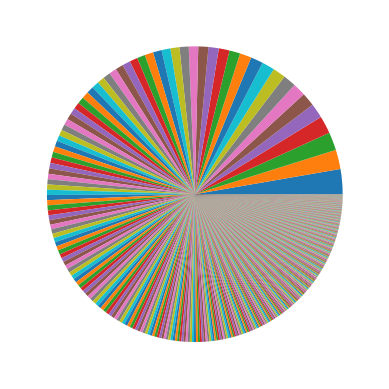

total revenue in category = 137453326.81




category = Foodgrains, Oil & Masala
                      category               brand     revenue  market_share
1632  Foodgrains, Oil & Masala            bb Royal  9679704.08         20.75
1480  Foodgrains, Oil & Masala   Himalayan Natives  1725972.95          3.70
1543  Foodgrains, Oil & Masala            Nutriorg  1541462.40          3.30
1631  Foodgrains, Oil & Masala          bb Popular  1272950.80          2.73
1630  Foodgrains, Oil & Masala            bb Combo  1126467.80          2.42
...                        ...                 ...         ...           ...
1497  Foodgrains, Oil & Masala               Killi     1100.00          0.00
1598  Foodgrains, Oil & Masala           Sugarlite      891.90          0.00
1565  Foodgrains, Oil & Masala  Popular Essentials      650.00          0.00
1540  Foodgrains, Oil & Masala           Nu-Shakti      350.00          0.00
1553  Foodgrains, Oil & Masala               Orino        0.00          

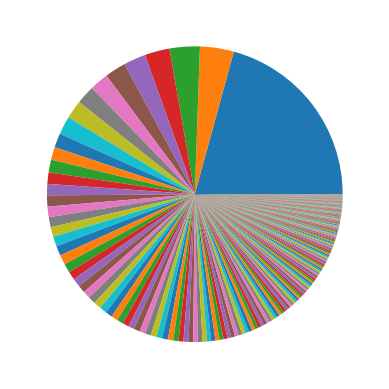

total revenue in category = 46643045.61




category = Snacks & Branded Foods
                    category                   brand     revenue  market_share
2697  Snacks & Branded Foods    RiteBite Max Protein  1625667.00          4.96
2641  Snacks & Branded Foods               NUTRIWISH  1528190.00          4.66
2438  Snacks & Branded Foods                  Alpino   855792.00          2.61
2592  Snacks & Branded Foods                Kelloggs   847678.67          2.59
2752  Snacks & Branded Foods           True Elements   789880.00          2.41
...                      ...                     ...         ...           ...
2495  Snacks & Branded Foods            Center Fruit      200.00          0.00
2433  Snacks & Branded Foods                   Aachi      150.00          0.00
2618  Snacks & Branded Foods  MOM Meal of the Moment      140.00          0.00
2602  Snacks & Branded Foods                 Krinkle        0.00          0.00
2721  Snacks & Branded Foods           Smith & Jones 

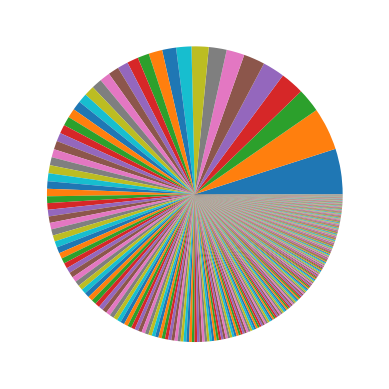

total revenue in category = 32779844.8




category = Beverages
      category            brand     revenue  market_share
958  Beverages           VAHDAM  2035728.80         10.78
951  Beverages          Teamonk  1553055.30          8.22
867  Beverages  Kapiva Ayurveda  1376443.90          7.29
911  Beverages        Pediasure  1104445.00          5.85
923  Beverages         Red Bull   623419.00          3.30
..         ...              ...         ...           ...
931  Beverages            Slice     1820.28          0.01
804  Beverages            Ammae     1560.00          0.01
964  Beverages           sumeru     1320.00          0.01
815  Beverages            Bindu      468.00          0.00
895  Beverages          Narasus      380.00          0.00

[171 rows x 4 columns]


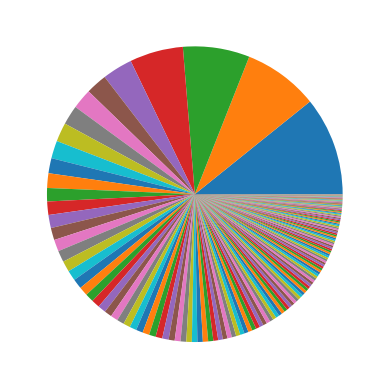

total revenue in category = 18886196.41




category = Bakery, Cakes & Dairy
                  category              brand     revenue  market_share
66   Bakery, Cakes & Dairy               Amul  1427256.55         13.28
92   Bakery, Cakes & Dairy   Fresho Signature   716034.97          6.66
109  Bakery, Cakes & Dairy         Milky Mist   639340.64          5.95
137  Bakery, Cakes & Dairy  The Baker's Dozen   554003.00          5.16
71   Bakery, Cakes & Dairy           BHealthy   489766.00          4.56
..                     ...                ...         ...           ...
83   Bakery, Cakes & Dairy          Delicious     2976.00          0.03
145  Bakery, Cakes & Dairy           e-millet     2340.00          0.02
84   Bakery, Cakes & Dairy         Dream Bake     1460.00          0.01
122  Bakery, Cakes & Dairy              Parle     1304.00          0.01
67   Bakery, Cakes & Dairy          Amul Gold      712.80          0.01

[85 rows x 4 columns]


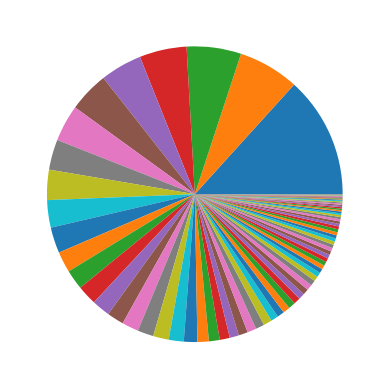

total revenue in category = 10746308.36




category = Baby Care
     category        brand     revenue  market_share
27  Baby Care      Huggies  6320032.67         21.65
43  Baby Care     Pampers   4504404.35         15.43
59  Baby Care  The Moms Co  2346627.00          8.04
8   Baby Care        Bella  1542373.00          5.28
33  Baby Care     Mamypoko  1362983.88          4.67
..        ...          ...         ...           ...
34  Baby Care       Manna     12771.00          0.04
57  Baby Care     Softsens    10250.00          0.04
50  Baby Care      Santoor     6624.80          0.02
12  Baby Care      Canopus     6450.00          0.02
44  Baby Care    Patanjali     1995.00          0.01

[65 rows x 4 columns]


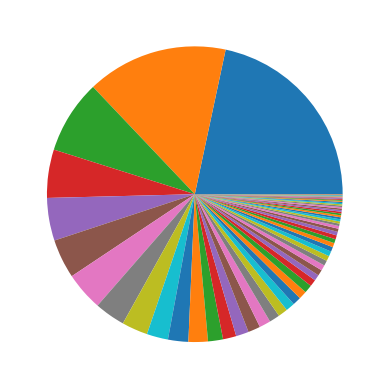

total revenue in category = 29195550.15




category = Fruits & Vegetables
                 category       brand     revenue  market_share
1635  Fruits & Vegetables      Fresho  2564739.17         97.84
1637  Fruits & Vegetables   Supa Corn    24649.00          0.94
1638  Fruits & Vegetables       Tadaa    18628.00          0.71
1639  Fruits & Vegetables    bb Combo    11742.00          0.45
1636  Fruits & Vegetables  RoseBazaar     1664.00          0.06


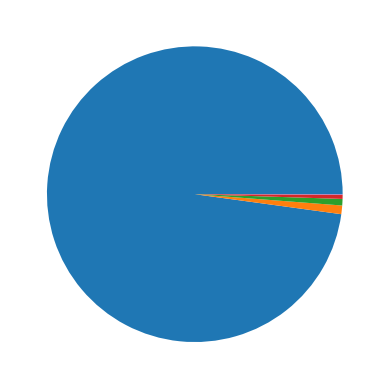

total revenue in category = 2621422.17




category = Eggs, Meat & Fish
               category                brand     revenue  market_share
1371  Eggs, Meat & Fish               Fresho  2136453.74         24.41
1372  Eggs, Meat & Fish     Fresho Signature  1153956.30         13.19
1382  Eggs, Meat & Fish             La Carne   689926.25          7.88
1362  Eggs, Meat & Fish             Big Sams   565290.00          6.46
1383  Eggs, Meat & Fish              Meatzza   541795.00          6.19
1373  Eggs, Meat & Fish                Gadre   423922.95          4.84
1398  Eggs, Meat & Fish             bb Combo   234153.63          2.68
1392  Eggs, Meat & Fish              Seastar   226238.00          2.59
1387  Eggs, Meat & Fish              Premier   224000.00          2.56
1374  Eggs, Meat & Fish         Golden Prize   217433.25          2.48
1379  Eggs, Meat & Fish                  Ifb   215715.00          2.46
1389  Eggs, Meat & Fish            Quickee'S   184550.00          2.11
1393 

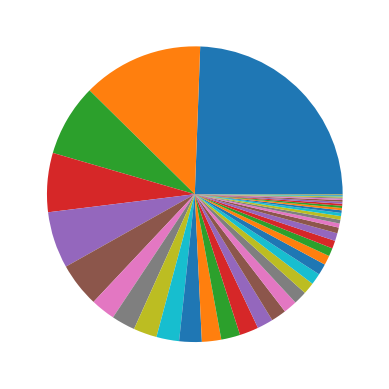

total revenue in category = 8751740.13






In [29]:
unique_categories = data['category'].unique()
print(len(unique_categories))
for cat in unique_categories:
    print(f"category = {cat}")
    temp_df = test[test['category']==cat].sort_values(by="revenue", ascending=False)[['category', 'brand', 'revenue']]
    total = temp_df['revenue'].sum()
    temp_df['market_share'] = round(100*(temp_df['revenue']/total), 2)
    print(temp_df)
    plt.pie(temp_df['market_share'])
    plt.show()
    print(f"total revenue in category = {round(total, 2)}")
    print("\n\n\n")

In [36]:
total_sales_by_brand = data.groupby(['category', 'brand'])['revenue'].sum().reset_index()


# find market share for each category and add new column as `market_share`
total_sales_by_brand['market_share'] = total_sales_by_brand.groupby('category')['revenue'].transform(lambda x: round(100* x / x.sum(), 2))
total_sales_by_brand = total_sales_by_brand.sort_values(by='market_share', ascending=False)

seasonal_top_5 = total_sales_by_brand.groupby('category')[['category', 'brand', 'revenue', 'market_share']].apply(lambda x: x.nlargest(5, 'market_share')).reset_index(drop=True)

seasonal_top_5


,category,brand,revenue,market_share
0,Baby Care,Huggies,6320032.67,21.65
1,Baby Care,Pampers,4504404.35,15.43
2,Baby Care,The Moms Co,2346627.00,8.04
3,Baby Care,Bella,1542373.00,5.28
4,Baby Care,Mamypoko,1362983.88,4.67
5,"Bakery, Cakes & Dairy",Amul,1427256.55,13.28
6,"Bakery, Cakes & Dairy",Fresho Signature,716034.97,6.66
7,"Bakery, Cakes & Dairy",Milky Mist,639340.64,5.95
8,"Bakery, Cakes & Dairy",The Baker's Dozen,554003.00,5.16
9,"Bakery, Cakes & Dairy",BHealthy,489766.00,4.56


In [ ]:
total_sales_by_brand = data.groupby(['category', 'brand', 'promotional_indicator'])['revenue'].sum().reset_index()

# pivot table => see percentage of promotional_indicator
# find market share for each category and add new column as `market_share`
total_sales_by_brand['market_share'] = total_sales_by_brand.groupby('category')['revenue'].transform(lambda x: round(100* x / x.sum(), 2))
total_sales_by_brand = total_sales_by_brand.sort_values(by='market_share', ascending=False)

seasonal_top_5 = total_sales_by_brand.groupby('category')[['category', 'brand', 'revenue', 'market_share']].apply(lambda x: x.nlargest(5, 'market_share')).reset_index(drop=True)

seasonal_top_5
